In [1]:
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import requests
from konlpy.tag import Okt
import pytagcloud
from collections import Counter
import nltk
from matplotlib.colors import LinearSegmentedColormap
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import collections
import mecab_util
from konlpy.tag import Hannanum
import pandas as pd
import re
from soynlp.tokenizer import RegexTokenizer

Populating the interactive namespace from numpy and matplotlib
pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
from wordcloud import WordCloud,STOPWORDS

In [3]:
#한글 형태소 분석기는 한나눔 분석기를 사용함.

nlp = Hannanum()

In [4]:
df = pd.read_csv('bd.csv')

In [5]:
df

,lawnum,lawname,reason,org,offer_date,notice_start,notice_end
0,2024166,대·중소기업 상생협력 촉진에 관한 법률 일부개정법률안,제안이유\r\n\r\n 「대·중소기업 상생협력 촉진에 관한 법률」 제32조제1항은...,산업통상자원중소벤처기업위원회,2019-12-03,2019-12-05,2019-12-14
1,2024165,공직선거법 일부개정법률안,\r\n\r\n 현행법은 누구든지 선거에 관한 여론조사 결과를 공표·보도하려는 때...,행정안전위원회,2019-12-03,2019-12-04,2019-12-13
2,2024164,국가재정법 일부개정법률안,\r\n\r\n 우리나라 지방은 생산에서 차지하는 비중이 50% 이상이나 여신비중...,기획재정위원회,2019-12-03,2019-12-04,2019-12-13
3,2024163,공직선거법 일부개정법률안,"제안이유\r\n\r\n 현행법은 선거에 관한 여론조사에 대하여 규정하고 있는데, ...",행정안전위원회,2019-12-03,2019-12-04,2019-12-13
4,2024162,민주화운동기념사업회법 일부개정법률안,\r\n\r\n 현행법은 민주화운동을 기념하고 그 정신을 계승하기 위하여 설립된 ...,행정안전위원회,2019-12-03,2019-12-04,2019-12-13
...,...,...,...,...,...,...,...
95,2024067,공직선거법 일부개정법률안,"\r\n 기탁금은 선거의 신뢰성 및 후보자의 진지성을 담보하고, 무분별한 후보자...",행정안전위원회,2019-11-29,2019-12-03,2019-12-12
96,2024066,변호사법 일부개정법률안,제안이유\r\n\r\n 변호사 징계의결은 징계 대상자의 권리·의무와 밀접히 관련된...,법제사법위원회,2019-11-29,NaN,NaN
97,2024064,저작권법 일부개정법률안(대안),대안의 제안이유\r\n 교과용도서에 게재된 공표된 저작물을 공중송신할 수 있는 근...,문화체육관광위원회,2019-11-28,NaN,NaN
98,2024063,국민체육진흥법 일부개정법률안(대안),주요내용\r\n가. 체육지도자 자격 취득시 성폭력 등 폭력 예방교육을 의무적으로 이...,문화체육관광위원회,2019-11-28,NaN,NaN


In [6]:
df.tail(10)

,lawnum,lawname,reason,org,offer_date,notice_start,notice_end
90,2024072,주차장법 일부개정법률안(대안),대안의 제안이유\r\n 최근 주차장 내 경사진 구역에 주차된 차량이 미끄러져 인명...,국토교통위원회,2019-11-29,NaN,NaN
91,2024071,특정범죄 가중처벌 등에 관한 법률 일부개정법률안(대안),대안의 제안이유\r\n 자동차 운전자는 교통안전에 취약한 어린이를 안전하게 보호하...,법제사법위원회,2019-11-29,NaN,NaN
92,2024070,국제협력요원 순직 심사 등에 관한 법률안,제안이유\r\n\r\n 국제협력요원 파견제도는 종전의 「병역법」(2016년 1월 ...,외교통일위원회,2019-11-29,2019-12-04,2019-12-18
93,2024069,산림자원의 조성 및 관리에 관한 법률 일부개정법률안,\r\n\r\n 건설공사 등 각종 공사의 예정가격 작성 시 관련 법률 또는 입찰·...,농림축산식품해양수산위원회,2019-11-29,2019-12-05,2019-12-14
94,2024068,한국마사회법 일부개정법률안,\r\n\r\n 불법사설경마의 시장 규모가 계속 확산되면서 매년 2조원이 넘는 ...,농림축산식품해양수산위원회,2019-11-29,2019-12-05,2019-12-14
95,2024067,공직선거법 일부개정법률안,"\r\n 기탁금은 선거의 신뢰성 및 후보자의 진지성을 담보하고, 무분별한 후보자...",행정안전위원회,2019-11-29,2019-12-03,2019-12-12
96,2024066,변호사법 일부개정법률안,제안이유\r\n\r\n 변호사 징계의결은 징계 대상자의 권리·의무와 밀접히 관련된...,법제사법위원회,2019-11-29,NaN,NaN
97,2024064,저작권법 일부개정법률안(대안),대안의 제안이유\r\n 교과용도서에 게재된 공표된 저작물을 공중송신할 수 있는 근...,문화체육관광위원회,2019-11-28,NaN,NaN
98,2024063,국민체육진흥법 일부개정법률안(대안),주요내용\r\n가. 체육지도자 자격 취득시 성폭력 등 폭력 예방교육을 의무적으로 이...,문화체육관광위원회,2019-11-28,NaN,NaN
99,2024062,포항지진의 진상조사 및 피해구제 등을 위한 특별법안(대안),대안의 제안이유\r\n\r\n 포항지진의 진상조사를 통해 포항지진의 구체적인 발생...,산업통상자원중소벤처기업위원회,2019-11-28,NaN,NaN


In [7]:
#키워드에 맞는 데이터 정규식 처리
p = r'.*(지방|기업|선거|범죄).*'
law = df[df['lawname'].str.match(p) |
           df['reason'].str.match(p, flags=re.MULTILINE)]
law.shape

(13, 7)

In [8]:
#명사추출
tokenizer = RegexTokenizer()
tokenizer

/opt/conda/lib/python3.7/site-packages/soynlp/tokenizer/_tokenizer.py:19: FutureWarning: Possible nested set at position 13
  ('english & latin', re.compile(u"[a-zA-ZÀ-ÿ]+[[`']?s]*|[a-zA-ZÀ-ÿ]+", re.UNICODE))


In [9]:
lawcontent = df['reason']

In [10]:
lawcontent

0     제안이유\r\n\r\n  「대·중소기업 상생협력 촉진에 관한 법률」 제32조제1항은...
1     \r\n\r\n  현행법은 누구든지 선거에 관한 여론조사 결과를 공표·보도하려는 때...
2     \r\n\r\n  우리나라 지방은 생산에서 차지하는 비중이 50% 이상이나 여신비중...
3     제안이유\r\n\r\n  현행법은 선거에 관한 여론조사에 대하여 규정하고 있는데, ...
4     \r\n\r\n  현행법은 민주화운동을 기념하고 그 정신을 계승하기 위하여 설립된 ...
                            ...                        
95     \r\n  기탁금은 선거의 신뢰성 및 후보자의 진지성을 담보하고, 무분별한 후보자...
96    제안이유\r\n\r\n  변호사 징계의결은 징계 대상자의 권리·의무와 밀접히 관련된...
97    대안의 제안이유\r\n  교과용도서에 게재된 공표된 저작물을 공중송신할 수 있는 근...
98    주요내용\r\n가. 체육지도자 자격 취득시 성폭력 등 폭력 예방교육을 의무적으로 이...
99    대안의 제안이유\r\n\r\n  포항지진의 진상조사를 통해 포항지진의 구체적인 발생...
Name: reason, Length: 100, dtype: object

In [11]:
lawcontent.to_csv('lawreason.txt',index = False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [12]:
lc = open('lawreason.txt')

In [13]:
data = lc.read()

In [14]:
nouns = nlp.nouns(data)

In [15]:
nouns

['제안이유',
 '「대·중소기업',
 '상생협력',
 '촉진',
 '법률」',
 '제32조제1항',
 '사업조정',
 '신청',
 '형식요건',
 '내용요건',
 '정의',
 '이',
 '확인',
 '검증절차',
 '법률',
 '구체적',
 '명시',
 '제도',
 '모호함',
 '야기',
 '한편',
 '제도',
 '악용',
 '부실',
 '운영',
 '지적',
 '일례',
 '신청자',
 '자격',
 '요건',
 '확인',
 '절차',
 '등',
 '미비',
 '실정',
 '사업조정',
 '내용',
 '요건',
 '‘경영',
 '악화',
 '현저성’',
 '검증',
 '절차',
 '근거',
 '자료',
 '미비',
 '사업조정',
 '적법성',
 '분쟁',
 '발생',
 '법원',
 '정부',
 '행정처분',
 '취소',
 '사례',
 '발생',
 '이',
 '사업조정',
 '형식',
 '내용',
 '신청',
 '요건',
 '확인',
 '절차',
 '법률',
 '제도',
 '미비점',
 '보완',
 '한편',
 '제도',
 '악용',
 '남용',
 '소지',
 '함',
 '한편',
 '현행법',
 '대기업',
 '가맹계약',
 '체결',
 '가맹점사업자',
 '신청',
 '자격',
 '부',
 '대기업',
 '표지',
 '이용',
 '대기업',
 '영업',
 '노하우',
 '이용',
 '가맹점사업자',
 '사업조정',
 '신청자격',
 '것',
 '불합리',
 '지적',
 '근거',
 '다음',
 '첫째',
 '현재',
 '규정',
 '가맹점사업자',
 '사업조정',
 '신청',
 '자격',
 '부',
 '경우',
 '자신',
 '가맹본부',
 '직영점',
 '대상',
 '사업조정',
 '신청',
 '수',
 '「가맹사업거래',
 '공정화',
 '법률」',
 '영업지역',
 '등',
 '보호',
 '상황',
 '사업조정',
 '신청',
 '자격',
 '별도',
 '부',
 '것',
 '모순',
 '이중규제',
 '상충',
 '문제',
 '발생',
 '등'

In [16]:
nouns = [n for n in nouns if len(n) > 1]

In [17]:
count = Counter(nouns)

In [18]:
count

Counter({'제안이유': 43,
         '「대·중소기업': 1,
         '상생협력': 3,
         '촉진': 11,
         '법률」': 22,
         '제32조제1항': 1,
         '사업조정': 17,
         '신청': 33,
         '형식요건': 1,
         '내용요건': 1,
         '정의': 5,
         '확인': 21,
         '검증절차': 1,
         '법률': 71,
         '구체적': 6,
         '명시': 5,
         '제도': 66,
         '모호함': 1,
         '야기': 3,
         '한편': 30,
         '악용': 6,
         '부실': 1,
         '운영': 30,
         '지적': 19,
         '일례': 1,
         '신청자': 1,
         '자격': 22,
         '요건': 35,
         '절차': 16,
         '미비': 4,
         '실정': 12,
         '내용': 31,
         '‘경영': 1,
         '악화': 7,
         '현저성’': 1,
         '검증': 6,
         '근거': 47,
         '자료': 20,
         '적법성': 3,
         '분쟁': 2,
         '발생': 41,
         '법원': 3,
         '정부': 26,
         '행정처분': 1,
         '취소': 7,
         '사례': 10,
         '형식': 1,
         '미비점': 13,
         '보완': 8,
         '남용': 2,
         '소지': 2,
         '현행법': 46,
       

In [19]:
def preprocessing(count):
    # 개행문자 제거
    count = re.sub('\\\\n', ' ', count)
    return count

In [20]:
#불용어 기본 정제
spwords = set(STOPWORDS)

In [21]:
spwords.add('경우')

In [22]:
tags = count.most_common(100)

In [23]:
tag = str(tags)

In [24]:
tag

"[('경우', 235), ('신설', 151), ('해당', 79), ('적용', 78), ('법률', 71), ('지원', 69), ('이상', 67), ('제도', 66), ('규정', 66), ('적용기한', 64), ('관련', 63), ('대상', 56), ('100분', 56), ('인정', 53), ('필요', 50), ('국가', 50), ('가산세', 49), ('근거', 47), ('규정하', 47), ('현행법', 46), ('범위', 46), ('사무', 46), ('사항', 45), ('주요내용', 44), ('확대', 44), ('대안', 44), ('제안이유', 43), ('마련', 43), ('납세자', 43), ('제외', 42), ('강화', 42), ('발생', 41), ('현행', 39), ('제한', 38), ('12월', 38), ('31일', 38), ('피후견인', 37), ('연장', 36), ('요건', 35), ('지역', 35), ('결과', 35), ('제출', 35), ('삭제', 35), ('지방자치단체', 35), ('사람', 35), ('활성화', 34), ('신청', 33), ('전환', 33), ('일부', 33), ('특례', 33), ('시ㆍ도', 33), ('다.', 32), ('감면', 32), ('세액공제', 32), ('내용', 31), ('중소기업', 31), ('개정', 31), ('대통령령', 31), ('한편', 30), ('운영', 30), ('개선', 30), ('사유', 30), ('3년', 30), ('수행', 29), ('보호', 28), ('조정', 28), ('사업', 28), ('처리', 28), ('행위능력', 28), ('등록', 27), ('대주주', 27), ('정부', 26), ('목적', 26), ('여론조사', 26), ('포함', 26), ('과세특례', 26), ('피한정후견인', 26), ('권한', 26), ('납부', 26), ('기간', 26

In [25]:
tag = re.findall("[0-9]{5}", tag)

In [26]:
tag = re.findall("[A-Z]{1}[0-9]{3}", str(tag))

In [27]:
fontpath = "/usr/share/fonts/JejuMyeongjo.ttf"
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname=fontpath).get_name()
rc('font', family=font_name)

In [28]:
#워드클라우드 스킨 이미지
cat_mask = imread('gov.png',0)

In [29]:
#워드클라우드 색상 팔레트
colors = ["#d3efef","#ef5350","#ef9a9a","#ff8a65","#ff9800","#66bb6a","#4caf50"] #greenorange
#colors = ["#283593","#5c6bc0","#673ab7","#ab47bc","#ba68c8","#9fa8da","#5e35b1"] #bluepurple

In [30]:
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

In [31]:
wc = WordCloud(font_path = fontpath , 
               stopwords = spwords,
               background_color = 'white',
               width = 800,
               height = 600,
               mask = cat_mask,
              colormap = cmap)

In [32]:
cloud = wc.generate_from_frequencies(dict(tags))

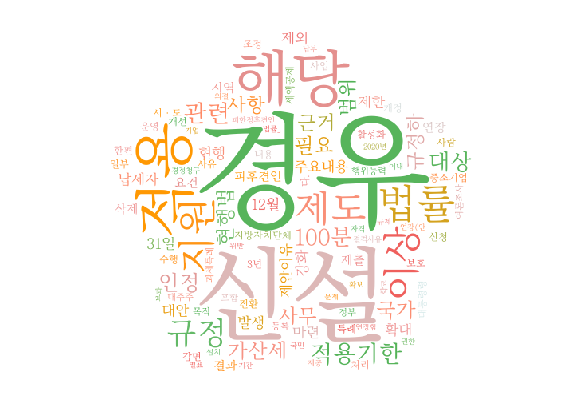

In [33]:
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [34]:
cloud.to_file('wc.png')